In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
# # Load all 12 sheets and combine
# excel_path = r'C:\Users\gr02n\OneDrive\Desktop\KNMI data - Manasa\\four_vs_station.xlsx'
# df = pd.concat(pd.read_excel(excel_path, sheet_name=None), ignore_index=True)

# # Convert date properly
# df['YYYYMMDD'] = pd.to_datetime(df['YYYYMMDD'], format='%Y%m%d', errors='coerce')

# # Convert numeric columns to float
# for col in ['FH', 'T', 'DR', 'RH']:
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# # Group by station and hour
# hourly_avg = df.groupby(['STN', 'HH']).agg({
#     'FH': 'mean',
#     'T': 'mean',
#     'DR': 'mean',
#     'RH': 'mean'
# }).reset_index()

# sns.set(style="whitegrid")

In [143]:
# # Manasa code
# # Wind Speed (FH)
# plt.figure(figsize=(10,6))
# sns.lineplot(data=hourly_avg, x='HH', y='FH', hue='STN', marker='o')
# plt.title('Hourly Variation of Wind Speed (FH) across Stations')
# plt.xlabel('Hour of the Day (1–24)')
# plt.ylabel('Average Wind Speed (0.1 m/s)')
# plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()

In [144]:
import json

# Files is still not in the branch
path_2023 = r'C:\Users\gr02n\OneDrive\Desktop\KNMI data - Manasa\KNMI-2023.json'
path_2024 = r'C:\Users\gr02n\OneDrive\Desktop\KNMI data - Manasa\KNMI-2024.json'

with open(path_2023, 'r') as file:
    raw_2023 = json.load(file)

with open(path_2024, 'r') as file:
    raw_2024 = json.load(file)

df_2023 = pd.DataFrame(raw_2023)
df_2024 = pd.DataFrame(raw_2024)

# FH    - Hourly average wind speed (in 0.1 m/s)
# T     - Temperature (in 0.1 degrees Celsius) at 1.50 m altitude during the observation
# DR    - Duration of precipitation (in 0.1 hour) per hourly section
# RH    - Hourly Sum of Precipitation (in 0.1 mm) (-1 for <0.05 mm)

df_2023['T'] = df_2023['T'] * 0.1   # turn into C
df_2023['RH'] = df_2023['RH'] * 0.1  # turn into mm
df_2023.tail()


,station_code,date,hour,FH,T,DR,RH
39739,391,2023-12-04T00:00:00.000Z,20,50.0,1.8,10.0,1.1
39740,391,2023-12-04T00:00:00.000Z,21,50.0,2.2,10.0,0.8
39741,391,2023-12-04T00:00:00.000Z,22,50.0,2.6,10.0,1.1
39742,391,2023-12-04T00:00:00.000Z,23,40.0,2.9,10.0,0.6
39743,391,2023-12-04T00:00:00.000Z,24,40.0,3.1,8.0,0.1


In [145]:
# Turn 'date' into a datetime object (rather than a string) # '%Y-%m-%dT%H:%M:%S.%fZ'
# df_2023['date'] = pd.to_datetime(df_2023['date'], format= 'mixed')
df_2023['date'] = pd.to_datetime(df_2023['date'], format = "%Y-%m-%dT%H:%M:%S.%fZ")

# extract the day, month, and year components
df_2023['day'] = df_2023['date'].dt.day
df_2023['month'] = df_2023['date'].dt.month
df_2023['year'] = df_2023['date'].dt.year

df_2023 = df_2023.drop('date', axis = 1)

In [146]:
df_2023.tail()

station = 391

df_2023_station = df_2023[df_2023['station_code'] == station]

df_2023_station.head()

# df_2023_station_391[df_2023_station_391['T'] > 20].head()

,station_code,hour,FH,T,DR,RH,day,month,year
38880,391,1,20.0,12.5,0.0,0.0,30,10,2023
38881,391,2,20.0,12.4,0.0,0.0,30,10,2023
38882,391,3,20.0,12.4,0.0,0.0,30,10,2023
38883,391,4,20.0,11.8,0.0,0.0,30,10,2023
38884,391,5,20.0,11.2,0.0,0.0,30,10,2023


In [147]:
# Group by station and hour
# hourly_avg = df_2023.groupby(['hour']).agg({
#     'FH': 'mean',
#     'T': 'mean',
#     'DR': 'mean',
#     'RH': 'mean'
# }).reset_index()

daily_avr_2023_station = df_2023_station.groupby(['day', 'month']).agg({
    'FH': 'mean',
    'T': 'mean',
    'DR': 'mean',
    'RH': 'mean'
}).reset_index()

print(daily_avr_2023_station)

    day  month         FH          T        DR        RH
0     1     11  29.166667  12.354167  1.916667  0.183333
1     1     12  24.583333  -0.420833  0.000000  0.000000
2     2     11  55.416667  12.279167  0.958333  0.079167
3     2     12  18.333333  -0.866667  0.000000  0.000000
4     3     11  32.916667   9.591667  0.000000  0.000000
5     3     12  27.500000   0.833333  1.750000  0.091667
6     4     11  33.333333   9.570833  2.458333  0.212500
7     4     12  43.750000   1.391667  3.708333  0.283333
8     5     11  30.000000  10.200000  3.500000  0.454167
9     6     11  29.583333   9.866667  0.291667  0.045833
10    7     11  24.166667   9.254167  0.208333  0.020833
11    8     11  29.166667   9.275000  2.791667  0.308333
12    9     11  24.583333   9.479167  2.875000  0.237500
13   10     11  22.083333   7.845833  2.083333  0.495833
14   11     11  17.083333   6.566667  0.416667  0.037500
15   12     11  10.416667   5.725000  0.000000  0.000000
16   13     11  31.250000  10.3

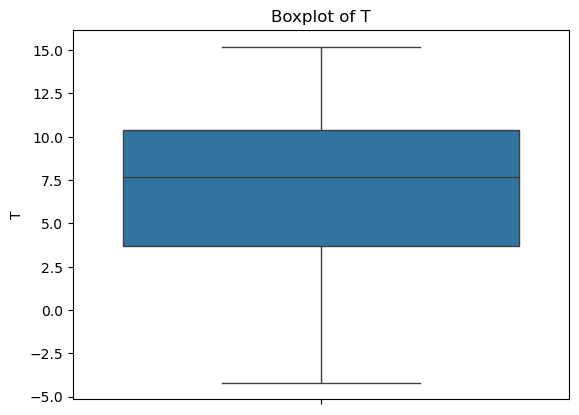

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(df_2023_station['T'])
plt.title('Boxplot of T')
plt.show()

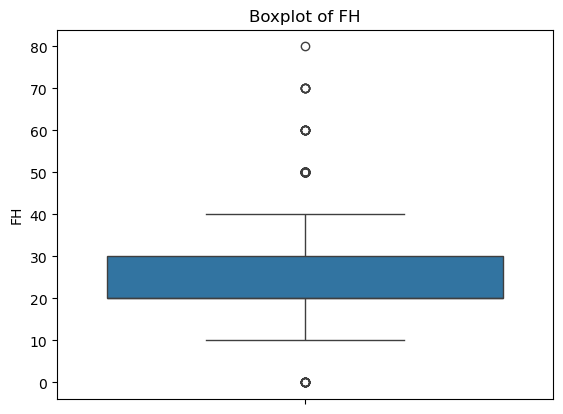

In [150]:
sns.boxplot(df_2023_station['FH'])
plt.title('Boxplot of FH')
plt.show()

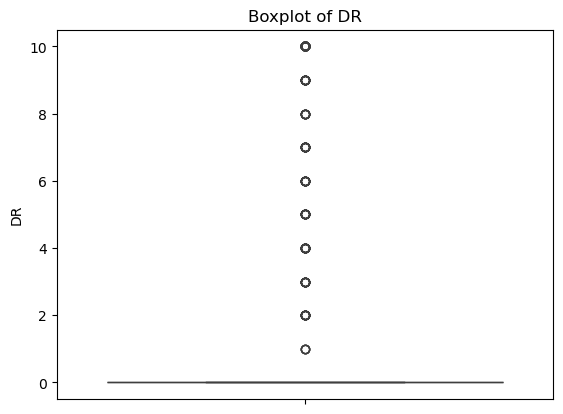

In [151]:
sns.boxplot(df_2023_station['DR'])
plt.title('Boxplot of DR')
plt.show()

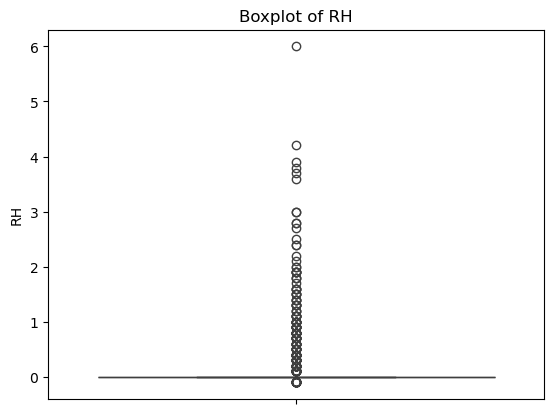

In [152]:
sns.boxplot(df_2023_station['RH'])
plt.title('Boxplot of RH')
plt.show()

In [153]:
# Format the temperature and rain properly
df_2024['T'] = df_2024['T'] * 0.1   # turn into C
df_2024['RH'] = df_2024['RH'] * 0.1  # turn into mm


# Format date
df_2024['date'] = pd.to_datetime(df_2024['date'], format = "%Y-%m-%dT%H:%M:%S.%fZ")

# extract the day, month, and year components
df_2024['day'] = df_2024['date'].dt.day
df_2024['month'] = df_2024['date'].dt.month
df_2024['year'] = df_2024['date'].dt.year

df_2024 = df_2024.drop('date', axis = 1)

# Station mask
df_2024_station = df_2024[df_2024['station_code'] == station]

# Groupby day and month and get the mean
daily_avr_2024_station = df_2024_station.groupby(['day', 'month']).agg({
    'FH': 'mean',
    'T': 'mean',
    'DR': 'mean',
    'RH': 'mean'
}).reset_index()

print(daily_avr_2024_station)

    day  month         FH          T        DR        RH
0     1     11  14.583333   9.954167  0.000000 -0.008333
1     1     12  27.500000   3.954167  0.083333  0.004167
2     2     11  19.583333   9.545833  0.458333  0.004167
3     2     12  25.833333   8.862500  0.958333  0.370833
4     3     11  13.750000   5.845833  0.000000  0.000000
5     4     11  20.000000   6.858333  0.000000  0.000000
6     5     11  15.000000   5.766667  0.000000  0.000000
7     6     11  11.250000   6.287500  0.000000 -0.004167
8     7     11  25.000000   5.575000  0.000000  0.000000
9     8     11  22.500000   5.812500  0.000000  0.000000
10    9     11  11.250000   7.291667  0.000000  0.000000
11   10     11   6.666667   8.941667  0.000000  0.000000
12   11     11  19.166667   9.687500  2.083333  0.262500
13   12     11  32.083333   8.429167  0.000000  0.000000
14   13     11  10.416667   7.537500  0.000000  0.000000
15   14     11  10.833333   9.308333  1.500000  0.033333
16   15     11  10.000000   8.0

In [163]:
import plotly.express as px

temperature_2023 = px.line(daily_avr_2023_station, x = 'day', y = 'T', title = 'Temperature 2023') # , color = 'name'
temperature_2023.show()

rain_2023 = px.line(daily_avr_2023_station, x = 'day', y = 'RH', title = 'Rain 2023')
rain_2023.show()

temperature_2024 = px.line(daily_avr_2024_station, x = 'day', y = 'T', title = 'Temperature 2024')
temperature_2024.show()

rain_2024 = px.line(daily_avr_2024_station, x = 'day', y = 'RH', title = 'Rain 2024')
rain_2024.show()

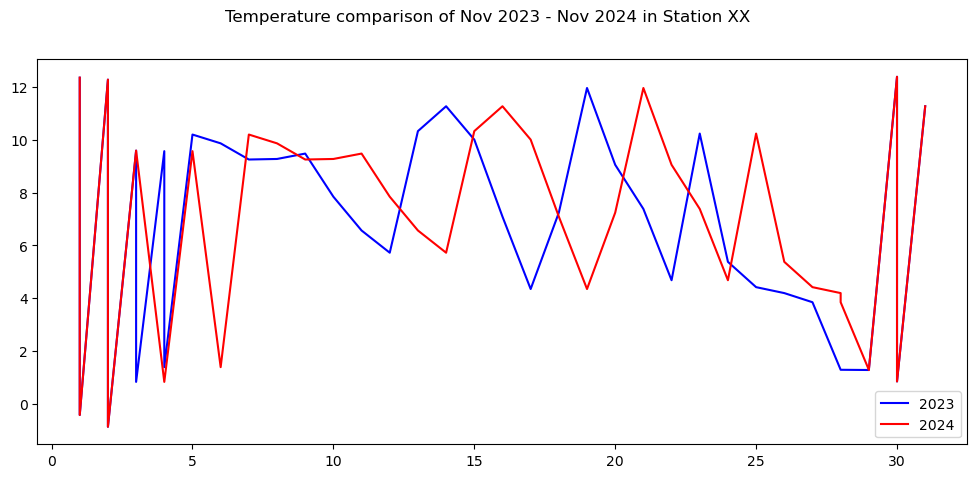

In [165]:
fig, ax_temp = plt.subplots(figsize=(12, 5))

l1, =ax_temp.plot(daily_avr_2023_station['day'], daily_avr_2023_station['T'], color = 'blue', label = '2023')
l2, =ax_temp.plot(daily_avr_2024_station['day'], daily_avr_2023_station['T'], color = 'red', label = '2023')

fig.suptitle('Temperature comparison of Nov 2023 - Nov 2024 in Station XX')

ax_temp.legend([l1, l2], ['2023', '2024'])

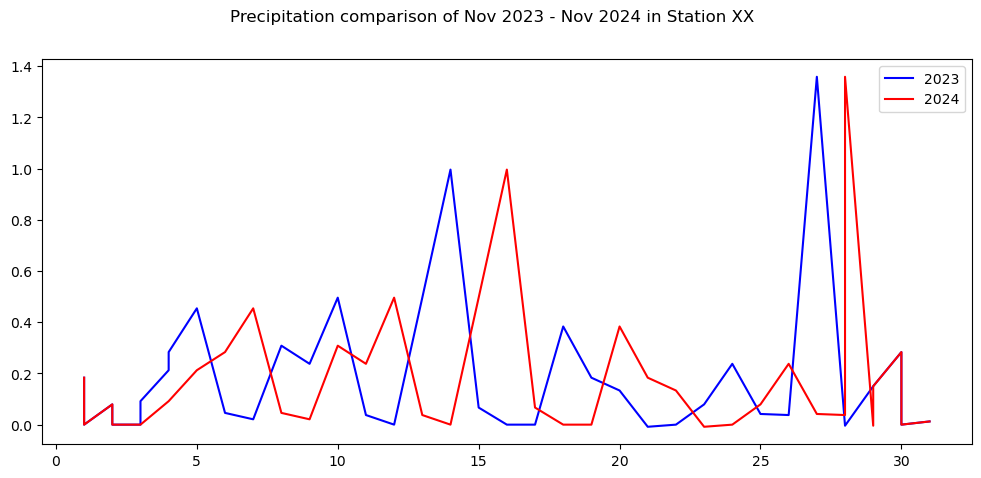

In [160]:
fig, ax_rain = plt.subplots(figsize=(12, 5))

l1, =ax_rain.plot(daily_avr_2023_station['day'], daily_avr_2023_station['RH'], color = 'blue', label = '2023')
l2, =ax_rain.plot(daily_avr_2024_station['day'], daily_avr_2023_station['RH'], color = 'red', label = '2023')

fig.suptitle('Precipitation comparison of Nov 2023 - Nov 2024 in Station XX')

ax_rain.legend([l1, l2], ['2023', '2024'])

In [171]:
df_difference = pd.DataFrame()

df_difference['T'] = daily_avr_2023_station['T'] - daily_avr_2024_station['T']
df_difference['RH'] = daily_avr_2023_station['RH'] - daily_avr_2024_station['RH']

print(df_difference)

# difference_T = px.line(df_difference, x = 'day', y = 'T', title = 'Temperature 2023') # , color = 'name'
# difference_T.show()



            T        RH
0    2.400000  0.191667
1   -4.375000 -0.004167
2    2.733333  0.075000
3   -9.729167 -0.370833
4    3.745833  0.000000
5   -6.025000  0.091667
6    3.804167  0.212500
7   -4.895833  0.287500
8    4.625000  0.454167
9    4.054167  0.045833
10   1.962500  0.020833
11   0.333333  0.308333
12  -0.208333 -0.025000
13  -0.583333  0.495833
14  -0.970833  0.037500
15  -3.583333 -0.033333
16   2.275000  0.508333
17   3.591667  1.000000
18   2.645833 -0.175000
19   1.908333 -0.033333
20  -1.150000 -0.829167
21   5.620833 -0.037500
22  11.737500  0.187500
23   7.100000  0.016667
24   2.783333 -0.170833
25  -9.895833 -0.054167
26  -2.537500 -0.104167
27  -2.770833  0.233333
28  -4.016667 -0.141667
29  -8.283333  0.016667
30  -2.320833  1.358333
31 -11.654167 -0.312500
32  -3.520833  0.150000
33  -0.641667  0.287500
34  -2.395833  0.000000
35   0.154167  0.012500
